In [1]:
import gempy as gp
import gempy_viewer as gpv
from gempy_engine.core.data.stack_relation_type import StackRelationType

Setting Backend To: AvailableBackends.numpy


Surface points hash:  8fe9250462c3e65080818a84d29925378664f6be46301dcdb42ed4047aa3fe6f
Orientations hash:  58d1d28be0c52dfdcedf36c9adc3b231e67d6923554159d6484dba589b0bfc5e
Could not find element 'rock3' in any group.
Could not find element 'magma' in any group.
Setting Backend To: AvailableBackends.numpy
Chunking done: 8 chunks
Chunking done: 7 chunks


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


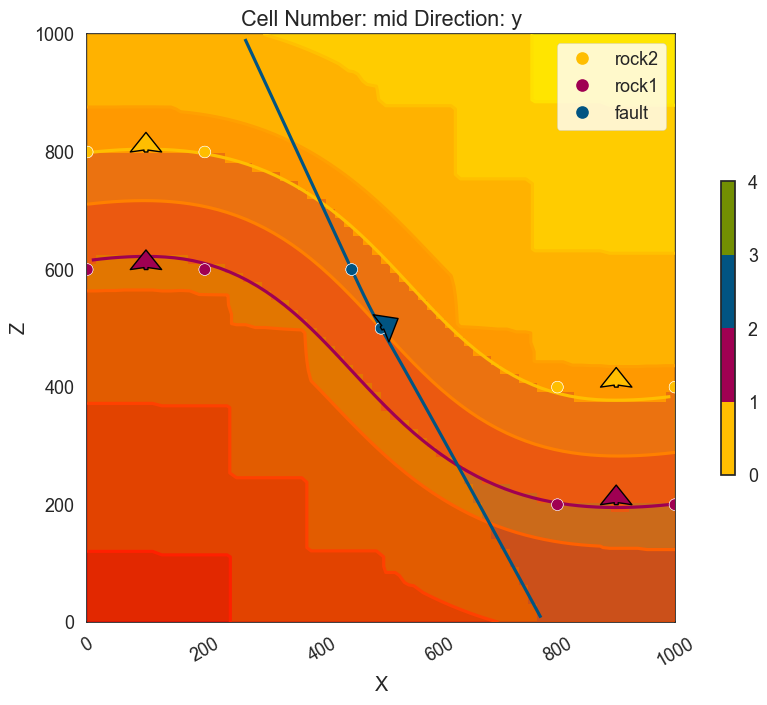

In [7]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"

# Crear un modelo geológico con un cuerpo magmático
data = gp.create_geomodel(
    project_name='magmatic_body',
    extent=[0, 1000, 0, 1000, 0, 1000],
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=path_to_data + "model5_orientations.csv",
        path_to_surface_points=path_to_data + "model5_surface_points.csv"
    )
)

# Mapear series geológicas a superficies
gp.map_stack_to_surfaces(
    gempy_model=data,
    mapping_object={
        "Sedimentary_Series": ('rock3', 'rock2', 'rock1'),
        "Magmatic_Body": 'magma'
    }
)

# Definir la relación estructural
data.structural_frame.structural_groups[1].structural_relation = StackRelationType.ERODE

# Computar el modelo geológico
gp.compute_model(data)
geo_data = data

# Visualizar en 2D para analizar el cuerpo magmático
gpv.plot_2d(geo_data, direction='y', show_data=True, show_scalar=True)


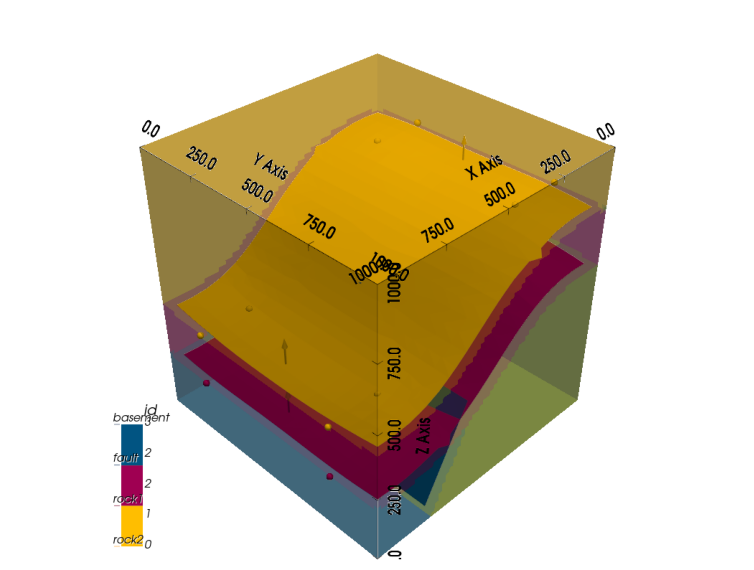

In [11]:
gpv.plot_3d(geo_data, direction="y", image=True)